# Earth Mover's distances for gevsimbad

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE


In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['s_MAIN_ID', 's_class', 'gev_1FGL_Name', 'gev_CLASS1', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevsimbad_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,0.016565,0.318116,0.116714,0.194982,0.353622,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
1,0.000004,0.000080,0.000017,0.000040,0.000080,0.0,0.000087,0.000036,0.000081,0.000102,...,0.0,0.000044,0.000123,0.000141,0.0,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
2,0.014351,0.087269,0.096480,0.058873,0.082640,0.0,0.000042,0.000023,0.000179,0.000817,...,0.0,0.000000,0.000000,0.000000,0.0,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,0.054146,0.123705,0.442960,0.121311,0.188794,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
4,0.046428,0.232212,0.271011,0.145261,0.304359,0.0,0.000000,0.000028,0.000026,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0


In [5]:
spectrum_columns = spectra.columns[:-len(other_names)]

In [7]:
spectra[spectrum_columns].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
125    1.0
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
141    1.0
142    1.0
143    1.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
150    1.0
151    1.0
152    1.0
153    1.0
154    1.0
Length: 155, dtype: float64

Computation of pairwise distances (metric - Earth mover's distance (Wasserstein distance))

In [8]:
dist = DistanceMetric.get_metric("pyfunc", func=st.wasserstein_distance)
spectra_distances = dist.pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

Vizualization (mapping to 2D-plane)

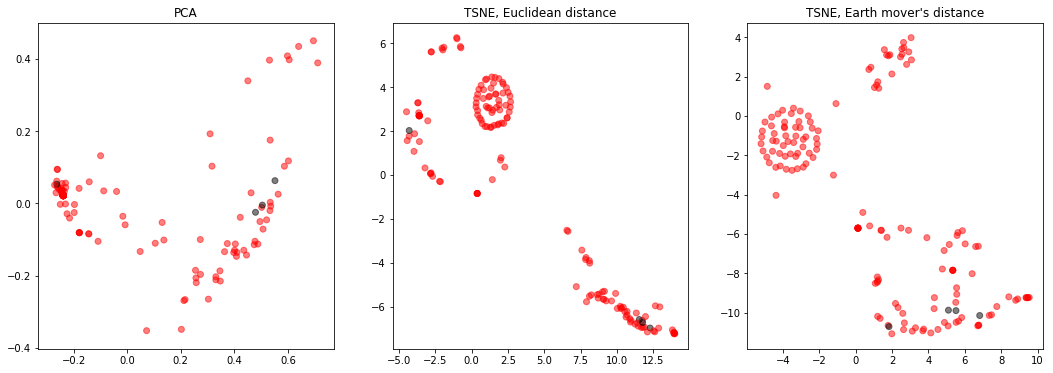

In [9]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Earth mover's distance")
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

KMeans clustering (with Earth mover's distance metric)

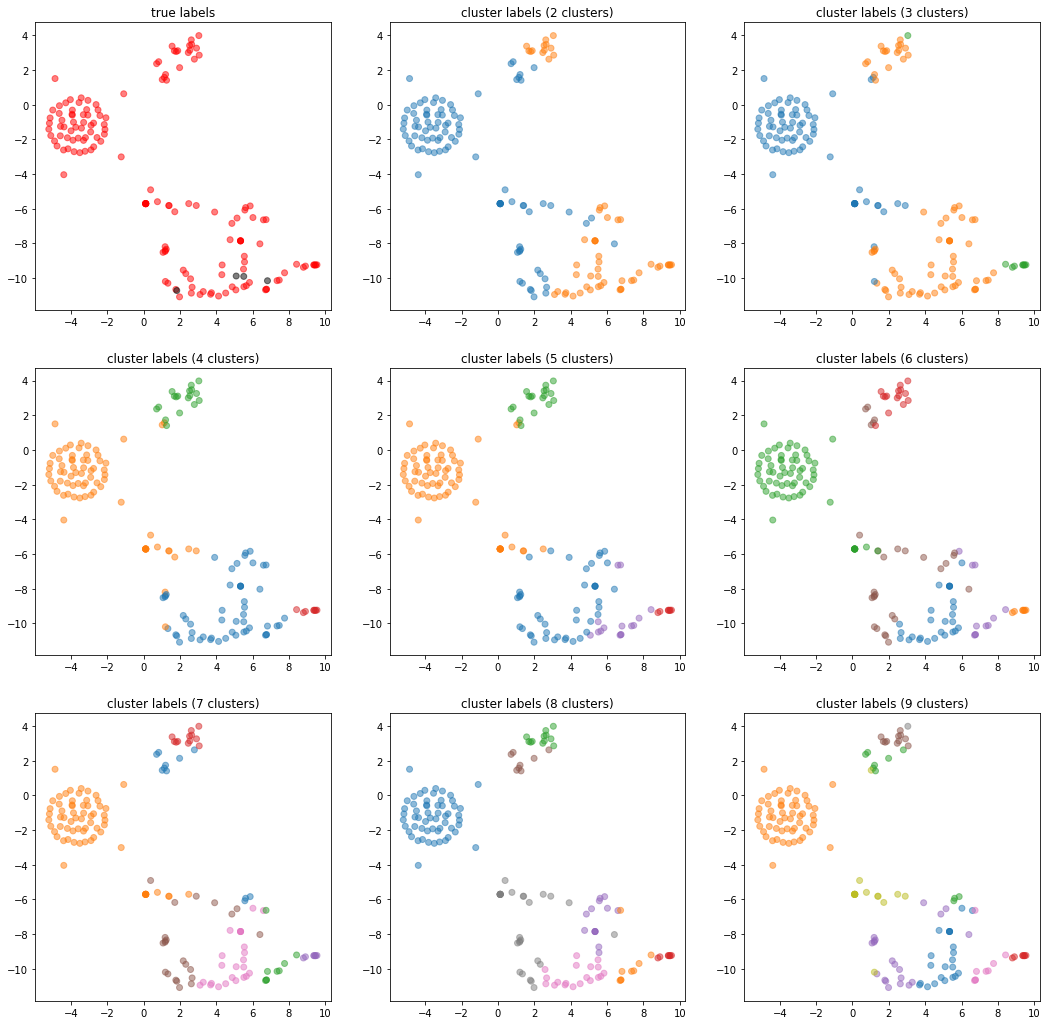

In [11]:
# visualization - tsne with Earth mover's distance
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

plt.subplots(figsize=(18, 18))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [12]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
6,b'LS I +56 58',B,b' ',b' ',0
7,b'PG 1101+529',B,b' ',b' ',0
11,b'EM* GGA 394',B,b' ',b'spp ',0
12,b'MAC 1-490',B,b' ',b'bcu ',0
13,b'LS IV -03 6',B,b'1FGL J1842.9-0359c',b' ',0
15,b'BD-14 5057',B,b' ',b' ',0
17,b'EM* GGR 129',B,b' ',b' ',0
21,b'CPD-58 2608B',B,b' ',b' ',0
23,b'Hen 3-1611',B,b' ',b'spp ',0
25,b'LS III +45 57',B,b'1FGL J2111.3+4607 ',b'PSR ',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
35,b'GCIRS 1W',B,b' ',b' ',0
36,b'GCIRS 1W',B,b'1FGL J1745.6-2900c',b'spp ',0
48,b'CPD-58 2614',O,b' ',b' ',0
53,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',0
79,b'2MASS J02254709+6206131',B0Ve,b' ',b' ',0
142,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
18,b'SDSS J085023.10+485826.3',B,b'1FGL J0849.9+4852 ',b'bll ',0
22,b'SDSS J104238.64+240826.6',B,b'1FGL J1043.1+2404 ',b'fsrq ',0
46,b'PG 0042+211',O,b'1FGL J0045.3+2127 ',b'bll ',0
47,b'LLNS 2720',O,b'1FGL J1045.2-5942 ',b'BIN ',0
58,b'AzV 236',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
73,b'AzV 216',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
75,b'AzV 233',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
85,b'AzV 228',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
87,b'OGLE SMC-SC8 83095',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
9,b'HD 306182',B,b' ',b'spp ',0
14,b'Cl Trumpler 16 215',B,b'1FGL J1045.2-5942 ',b'BIN ',0
16,b'TYC 8958-1269-1',B,b' ',b'PSR ',0
26,b'TYC 158-2839-1',B,b' ',b'spp ',0
39,b'TYC 8958-3477-1',B,b' ',b'PSR ',0
41,b'HD 92406',B,b' ',b' ',0
44,b'TYC 9044-1653-1',B,b' ',b'bll ',0
61,b'HD 306179',B0Ve,b' ',b'spp ',0
64,b'HD 192039',B0Ve,b' ',b' ',0
67,b'CPD-59 2674',B0Ve,b' ',b' ',0


4 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
27,b'EC 20443-3134',B,b' ',b' ',0
49,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',0
55,b'TYC 3156-998-1',O,b' ',b'SFR ',0
77,b'BBRW W3 (c)',B0Ve,b' ',b' ',0
78,b'[WBN72] W 3 IRS 2b',B0Ve,b' ',b' ',0
89,b'2MASS J02252738+6203432',B0Ve,b' ',b' ',0
90,b'HD 104705',B0Ve,b' ',b'psr ',0
91,b'LS I +61 303',B0Ve,b'1FGL J0240.5+6113 ',b'HMB ',1
92,b'HD 330587',B0Ve,b' ',b' ',0


5 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
5,b'LS VI -04 15',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
10,b'GSC 05698-00468',B,b' ',b'spp ',0
19,b'LS IV -14 70',B,b' ',b' ',0
20,b'LS IV -14 72',B,b' ',b' ',0
24,b'LS III +50 6',B,b'1FGL J2046.0+4954 ',b'SNR ',0
28,b'EC 19516-5652',B,b' ',b'bcu ',0
29,b'DETWC Tr 16 J104445.3-593920',B,b'1FGL J1045.2-5942 ',b'BIN ',0
